# Eigenfaces with PCA

One of the most striking demonstrations of SVD/PCA is the so-called eigenfaces example. In this problem, PCA (i.e. SVD on mean-subtracted data) is applied to a large library of facial images to extract the most dominant correlations between images. The result of this decomposition is a set of eigenfaces that define a new coordinate system. Images may be represented in these co- ordinates by taking the dot product with each of the principal components. Images of the same person tend to cluster in the eigenface space, making this a useful transformation formation for facial recognition and classification.

In [1]:
from time import time
import os
import scipy.io

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.constrained_layout.use'] = True

mat_contents = scipy.io.loadmat('../data/allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

## Compute Eigenfaces / Performing SVD on face library

In [2]:
# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
print("Computing eigenfaces / Performing SVD on face library")
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
t0 = time()
U, S, VT = np.linalg.svd(X,full_matrices=0)
print(f"done in {time()-t0:0.3f}s")

Computing eigenfaces / Performing SVD on face library
done in 77.028s


### Plot Eigenfaces

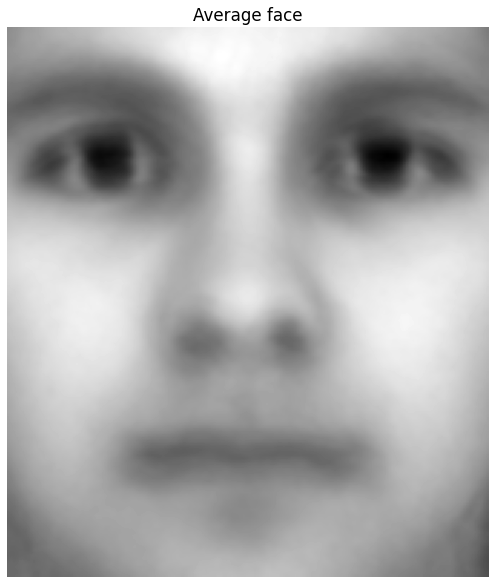

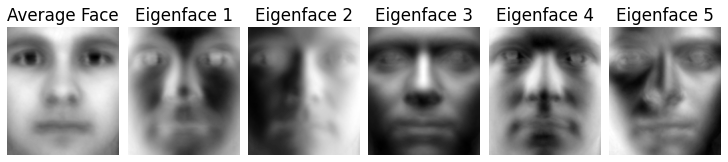

In [55]:
# Plot avg face
fig1 = plt.figure()
ax = fig1.add_subplot()
img_avg = ax.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')
plt.title("Average face")
plt.show()

# Plot first 5 eigenfaces
fig2 = plt.figure(figsize=(10, 3))
ax = fig2.add_subplot(161)
img_avg = ax.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
ax.set_title("Average Face")
plt.axis('off')

for i in range(5):
  ax = fig2.add_subplot(1, 6, i+2)
  img = ax.imshow(np.reshape(U[:,i],(m,n)).T)
  img.set_cmap('gray')
  ax.set_title(f"Eigenface {i+1}")
  plt.axis('off')

# plt.savefig('../LaTeX/igures/eigenfaces.pdf')
plt.show()

## Plot the singular values

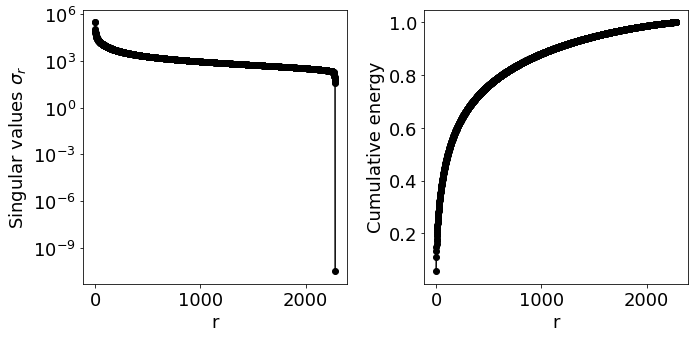

In [4]:
fig3 = plt.figure(figsize=(10, 5), tight_layout=True)
ax1 = fig3.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax1.set(xlabel='r', ylabel='Singular values $\sigma{}_r$')
ax2 = fig3.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
ax2.set(xlabel='r', ylabel='Cumulative energy')

# plt.savefig('../LaTeX/figures/singularValues.pdf')
plt.show()

### Amount of variance / energy captured by first n eigenfaces
This score helps to determine the number of principal components to use for later facial recognition.

In [5]:
n_components = 150
var = np.sum(S[:n_components])/np.sum(S)
print(f"Amount of variance captured by first {n_components} eigenfaces: {var*100:.1f}")

Amount of variance captured by first 150 eigenfaces: 55.1


## Reconstruction of image with varying amount of eigenfaces
Now show eigenface Reconstruction of an image that was omitted from test set from which the eigenfaces were computed.

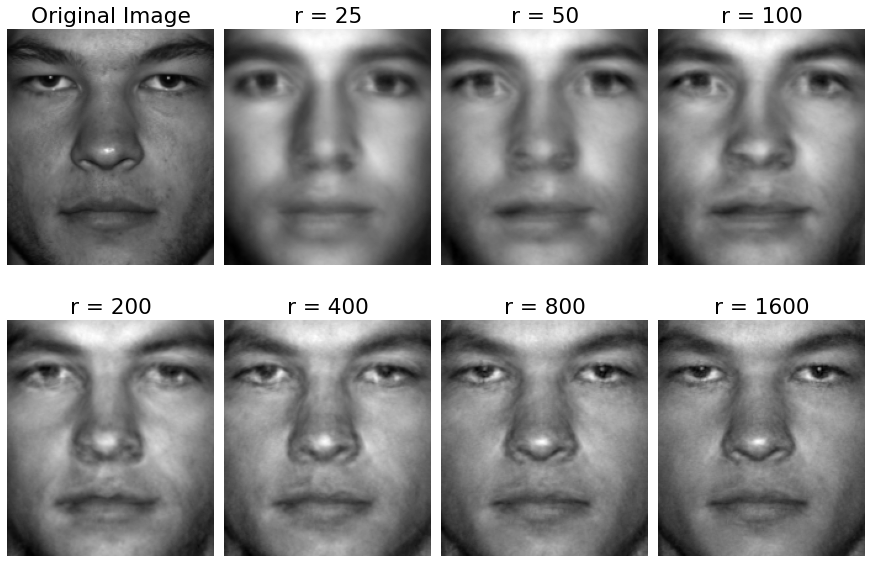

In [9]:
testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37

testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]
width = 4
height = int(np.ceil(len(r_list)/width))
fig4 = plt.figure(figsize=(12, 8))
ax = fig4.add_subplot(height, width, 1)
img = ax.imshow(np.reshape(testFace,(m,n)).T)
img.set_cmap('gray')
ax.set_title('Original Image')
plt.axis('off')

for r in r_list:
    reconFace = avgFace + U[:,:r] @ (U[:,:r].T @ testFaceMS)
    ax = fig4.add_subplot(height, width, r_list.index(r)+2)
    img = ax.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    ax.set_title('r = ' + str(r))
    plt.axis('off')

plt.show()

## Dimensionality reduction / compression 
Now using the other orthogonal basis computed from SVD for actual dimensionality reduction / compression.

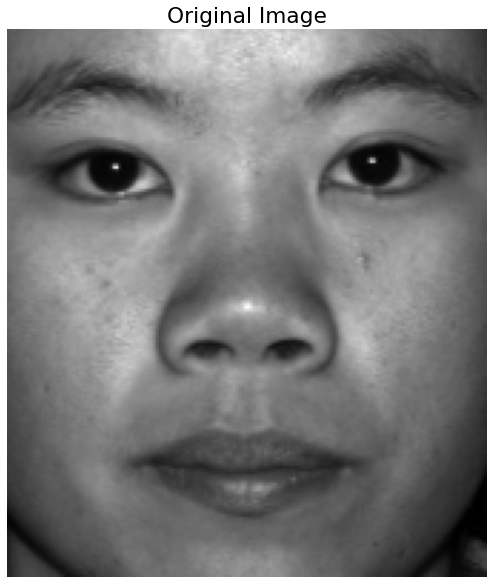

Original size: (32256,)
Compressed size: (25,)
Compressed size: (50,)
Compressed size: (100,)
Compressed size: (200,)
Compressed size: (400,)
Compressed size: (800,)
Compressed size: (1600,)


In [16]:
testFace = faces[:,np.sum(nfaces[:35])] # First face of person 36

testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]
plt.imshow(np.reshape(testFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

print(f"Original size: {testFace.shape}")


for r in r_list:
    comprFace = U[:,:r].T @ testFaceMS
    print(f"Compressed size: {comprFace.shape}")

## Project person 2 and 7 onto PC5 and PC6
This shows PCA's ability to find discriminant features useful for facial recognition ta

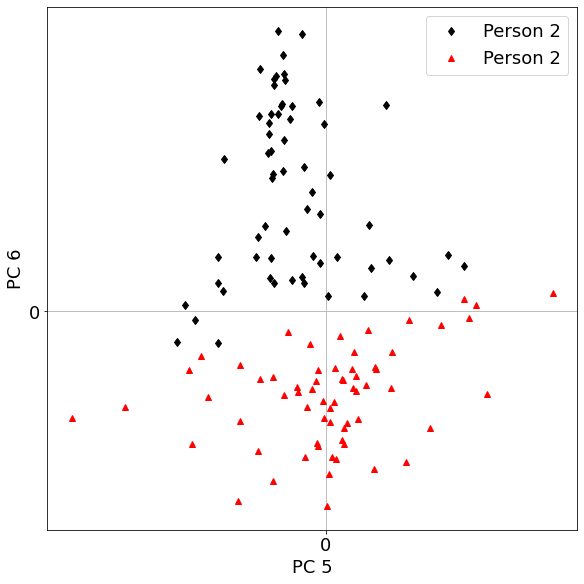

In [17]:
P1num = 2 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:, np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:, np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace, (P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace, (P2.shape[1],1)).T

PCAmodes = [5, 6]
PCACoordsP1 = U[:, PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:, PCAmodes-np.ones_like(PCAmodes)].T @ P2

fig, ax = plt.subplots()
ax.plot(PCACoordsP1[0, :], PCACoordsP1[1, :], 'd', Color='k', label=f"Person {P1num}")
ax.plot(PCACoordsP2[0, :], PCACoordsP2[1, :], '^', Color='r', label=f"Person {P1num}")
ax.set(xlabel="PC 5", ylabel="PC 6")
ax.set_xticks([0])
ax.set_yticks([0])

plt.grid()
plt.legend()
plt.show()